In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing dataset
data=pd.read_csv('British_Airways_Cust_Review_Data.csv')
sentiments=pd.read_csv('Sentiment_Analysis_British_Airways.csv')

In [5]:
#creating of new dataset with customer sentiment scores
data_ovr=pd.concat([data,sentiments],axis=1)

In [6]:
#removing the columns not required for our analysis
data_ovr.drop(columns=['Unnamed: 0','Cust_ID'],inplace=True)
data_ovr.head()

,cust_name,cust_country,rev_date,rev_title,rev_ovr,cust_verified,aircraft_name,traveller_type,seat_type,route_,...,rating_seat_com,rating_cabin_staff_ser,rating_food_bev,rating_flight_ent,rating_ground_ser,rating_wifi,rating_valueformoney,recommendation,comments,sentiment
0,G Jones,United Kingdom,28th April 2023,"""premium price for very average service""",5.0,Not Verified,Boeing 787,Couple Leisure,Business Class,Singapore to London,...,4.0,2.0,1.0,5.0,3.0,1.0,1,no,regarding the aircraft and seat: the business ...,3
1,Michelle Morgan,Sweden,26th April 2023,"""lack of customer service""",1.0,Not Verified,NaN,Couple Leisure,Economy Class,Sweden to Los Angeles via London,...,3.0,3.0,3.0,2.0,3.0,NaN,1,no,i travelled with british airways from sweden t...,1
2,Srinivasan Balaji,United States,24th April 2023,"""Overall not a good airline""",2.0,Not Verified,Boeing 777,Couple Leisure,Premium Economy,Seattle to Zagreb via London,...,3.0,2.0,1.0,1.0,3.0,1.0,2,no,food was lousy. who ever is planning the asia...,2
3,P Patel,Canada,24th April 2023,"""delayed and missed connecting flight""",1.0,Trip Verified,Boeing 777,Family Leisure,Premium Economy,"Bangalore to Toronto via London,",...,2.0,1.0,2.0,3.0,1.0,NaN,1,no,had the worst experience. the flight from lond...,1
4,C Mayre,Ireland,23rd April 2023,"""!not a good experience""",1.0,Trip Verified,Dreamliner,Family Leisure,Economy Class,London to Denver,...,2.0,1.0,1.0,3.0,1.0,1.0,2,no,the ground staff were not helpful. felt like ...,2


In [11]:
#Getting a data file with all the data 
data_ovr.to_csv(r'C:\Users\jubin\OneDrive\Desktop\Models\British_Airways_Project\Web_Scrapper + Customer sentiment analysis\Data\Data.csv',encoding='utf-8')

In [6]:
#understanding the data
data_ovr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3537 entries, 0 to 3536
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_name               3537 non-null   object 
 1   cust_country            3535 non-null   object 
 2   rev_date                3537 non-null   object 
 3   rev_title               3537 non-null   object 
 4   rev_ovr                 3532 non-null   float64
 5   cust_verified           1223 non-null   object 
 6   aircraft_name           1845 non-null   object 
 7   traveller_type          2767 non-null   object 
 8   seat_type               3535 non-null   object 
 9   route_                  3537 non-null   object 
 10  fly_date                2759 non-null   object 
 11  rating_seat_com         3435 non-null   float64
 12  rating_cabin_staff_ser  3425 non-null   float64
 13  rating_food_bev         3191 non-null   float64
 14  rating_flight_ent       2476 non-null   

In [7]:
#Basic inferences for categorical variables
data_ovr.describe(include='object')

,cust_name,cust_country,rev_date,rev_title,cust_verified,aircraft_name,traveller_type,seat_type,route_,fly_date,recommendation
count,3537,3535,3537,3537,1223,1845,2767,3535,3537,2759,3537
unique,2774,69,1711,2525,2,193,4,4,1521,105,2
top,David Ellis,United Kingdom,19th January 2015,British Airways customer review,Trip Verified,A320,Couple Leisure,Economy Class,LHR-BOM,August 2015,no
freq,43,2248,26,956,1030,340,935,1828,771,83,2070


In [8]:
#Basic inferences for numerical variables
data_ovr.describe()

,rev_ovr,rating_seat_com,rating_cabin_staff_ser,rating_food_bev,rating_flight_ent,rating_ground_ser,rating_wifi,rating_valueformoney,sentiment
count,3532.000000,3435.000000,3425.000000,3191.000000,2476.000000,2698.000000,545.000000,3537.000000,3537.000000
mean,4.816535,2.896652,3.272701,2.731119,2.657916,2.832098,1.943119,2.727170,2.486853
std,3.164745,1.360512,1.486829,1.440709,1.397148,1.446992,1.364759,1.467764,1.344887
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000
75%,8.000000,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [9]:
#Cheching the revies by countries
#UK customers have put up the most reviews
data_ovr['cust_country'].value_counts().head(20)

United Kingdom          2248
United States            375
Australia                151
Canada                   109
Germany                   59
Ireland                   39
South Africa              38
Switzerland               37
Netherlands               34
Spain                     27
France                    27
Singapore                 27
Belgium                   25
Thailand                  23
United Arab Emirates      22
Sweden                    20
India                     19
China                     18
Italy                     18
Hong Kong                 15
Name: cust_country, dtype: int64

In [10]:
#Creating a pivot table for summarizing few details
pd.pivot_table(data=data_ovr,index=['traveller_type'],values=['rev_ovr','sentiment','rating_seat_com','rating_cabin_staff_ser','rating_ground_ser','rating_valueformoney','rating_food_bev','rating_flight_ent','rating_wifi']).sort_values(by=['rev_ovr'],ascending=False)

,rating_cabin_staff_ser,rating_flight_ent,rating_food_bev,rating_ground_ser,rating_seat_com,rating_valueformoney,rating_wifi,rev_ovr,sentiment
traveller_type,,,,,,,,,
Solo Leisure,3.390394,2.851190,2.854620,3.024213,3.047912,2.854093,2.007407,5.117438,2.608541
Couple Leisure,3.221978,2.739425,2.668639,2.872964,2.786418,2.605348,1.947059,4.602139,2.444920
Family Leisure,3.231638,2.650206,2.600000,2.807263,2.816901,2.557641,2.076087,4.423592,2.383378
Business,2.862306,2.283019,2.222011,2.516892,2.487179,2.155844,1.797297,3.569805,2.060065


In [11]:
#Creating a pivot table for summarizing few details
pd.pivot_table(data=data_ovr,index=['seat_type'],values=['rev_ovr','sentiment','rating_seat_com','rating_cabin_staff_ser','rating_ground_ser','rating_valueformoney','rating_food_bev','rating_flight_ent','rating_wifi']).sort_values(by=['rev_ovr'],ascending=False)

,rating_cabin_staff_ser,rating_flight_ent,rating_food_bev,rating_ground_ser,rating_seat_com,rating_valueformoney,rating_wifi,rev_ovr,sentiment
seat_type,,,,,,,,,
First Class,3.933333,3.081633,3.240385,3.149351,3.695238,3.071090,1.823529,6.019048,2.966825
Business Class,3.482605,2.701107,2.962591,2.973526,2.928762,2.802620,2.157895,5.179196,2.651528
Premium Economy,3.125364,2.798107,2.709970,2.900763,3.043732,2.712251,2.181818,4.914530,2.472934
Economy Class,3.088050,2.516551,2.505148,2.706207,2.754126,2.644967,1.765568,4.434521,2.330416


Text(0.5, 1.0, 'Distribution over Sentiment Ratings (Countplot)')

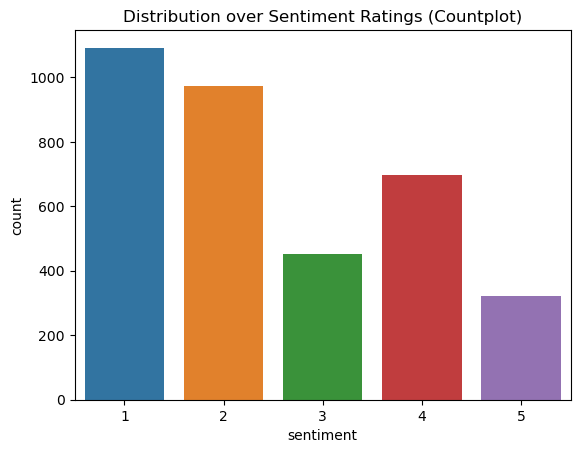

In [12]:
sns.countplot(x=data_ovr['sentiment']).set_title('Distribution over Sentiment Ratings (Countplot)')

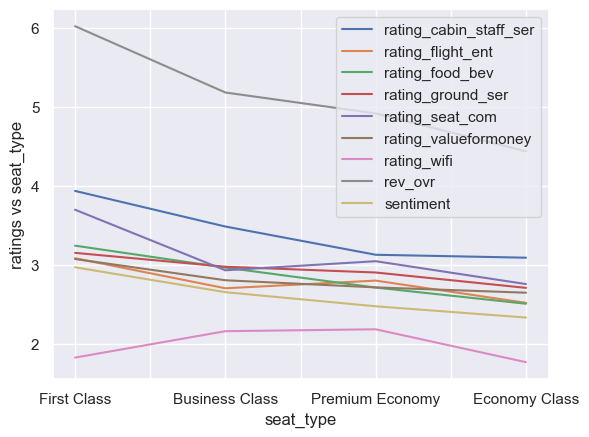

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
pd.pivot_table(data=data_ovr,index=['seat_type'],
                      values=['rev_ovr','sentiment','rating_seat_com','rating_cabin_staff_ser','rating_ground_ser','rating_valueformoney','rating_food_bev','rating_flight_ent','rating_wifi']).sort_values(by=['rev_ovr'],ascending=False).plot()
plt.ylabel('ratings vs seat_type');

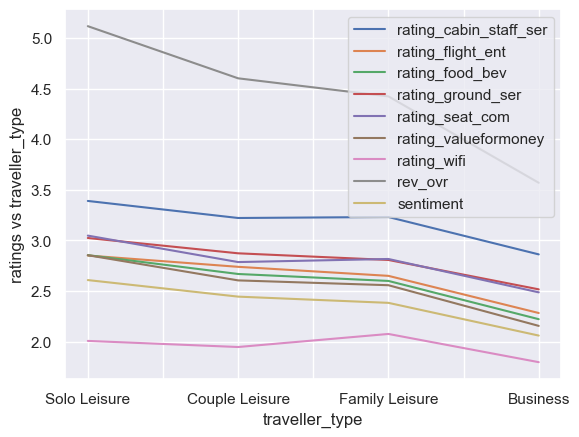

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
pd.pivot_table(data=data_ovr,index=['traveller_type'],
                      values=['rev_ovr','sentiment','rating_seat_com','rating_cabin_staff_ser','rating_ground_ser','rating_valueformoney','rating_food_bev','rating_flight_ent','rating_wifi']).sort_values(by=['rev_ovr'],ascending=False).plot()
plt.ylabel('ratings vs traveller_type');

In [113]:
bb=data_ovr.groupby(['cust_country','seat_type'])
bb.head()

,cust_name,cust_country,rev_date,rev_title,rev_ovr,cust_verified,aircraft_name,traveller_type,seat_type,route_,fly_date,rating_seat_com,rating_cabin_staff_ser,rating_food_bev,rating_flight_ent,rating_ground_ser,rating_wifi,rating_valueformoney,recommendation,sentiment
0,G Jones,United Kingdom,28th April 2023,"""premium price for very average service""",5.0,Not Verified,Boeing 787,Couple Leisure,Business Class,Singapore to London,April 2023,4.0,2.0,1.0,5.0,3.0,1.0,1,no,3
1,Michelle Morgan,Sweden,26th April 2023,"""lack of customer service""",1.0,Not Verified,NaN,Couple Leisure,Economy Class,Sweden to Los Angeles via London,January 2023,3.0,3.0,3.0,2.0,3.0,NaN,1,no,1
2,Srinivasan Balaji,United States,24th April 2023,"""Overall not a good airline""",2.0,Not Verified,Boeing 777,Couple Leisure,Premium Economy,Seattle to Zagreb via London,April 2023,3.0,2.0,1.0,1.0,3.0,1.0,2,no,2
3,P Patel,Canada,24th April 2023,"""delayed and missed connecting flight""",1.0,Trip Verified,Boeing 777,Family Leisure,Premium Economy,"Bangalore to Toronto via London,",April 2023,2.0,1.0,2.0,3.0,1.0,NaN,1,no,1
4,C Mayre,Ireland,23rd April 2023,"""!not a good experience""",1.0,Trip Verified,Dreamliner,Family Leisure,Economy Class,London to Denver,February 2023,2.0,1.0,1.0,3.0,1.0,1.0,2,no,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406,F V Obrien,Thailand,25th June 2014,British Airways customer review,2.0,NaN,NaN,NaN,Premium Economy,LHR-BOM,NaN,2.0,3.0,1.0,2.0,NaN,NaN,1,no,2
3452,S Tsoy,Russian Federation,8th June 2014,British Airways customer review,6.0,NaN,NaN,NaN,Economy Class,LHR-BOM,NaN,4.0,3.0,3.0,3.0,NaN,NaN,3,yes,4
3458,Linda Bowen,Barbados,4th June 2014,British Airways customer review,10.0,NaN,NaN,NaN,Economy Class,LHR-BOM,NaN,3.0,4.0,5.0,4.0,NaN,NaN,5,yes,5
3464,Peter Bedson,Oman,1st June 2014,British Airways customer review,5.0,NaN,NaN,NaN,Economy Class,LHR-BOM,NaN,3.0,2.0,2.0,4.0,NaN,NaN,3,yes,2


In [38]:
#Creating a pivot table for summarizing few details
pd.pivot_table(data=data_ovr,index=['cust_name'],
               values=['rev_ovr','sentiment','rating_seat_com','rating_cabin_staff_ser','rating_ground_ser','rating_valueformoney','rating_food_bev','rating_flight_ent','rating_wifi']).sort_values(by=['cust_name'],ascending=False)

,rating_cabin_staff_ser,rating_flight_ent,rating_food_bev,rating_ground_ser,rating_seat_com,rating_valueformoney,rating_wifi,rev_ovr,sentiment
cust_name,,,,,,,,,
m Leeson,4.000000,3.0,2.0,1.000000,3.0,3.000000,5.0,6.000000,2.000000
l Higgs,4.000000,3.0,2.0,3.000000,4.0,3.000000,1.0,8.000000,4.000000
ian depper,1.000000,1.0,2.0,4.000000,3.0,2.000000,NaN,5.000000,1.000000
barbara ciereszko,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000
Zoraya Ulloa,5.000000,4.0,5.0,2.000000,5.0,5.000000,NaN,9.000000,4.000000
...,...,...,...,...,...,...,...,...,...
A Alzuhairi,1.000000,1.0,1.0,2.000000,1.0,2.000000,1.0,1.000000,1.000000
A Almasha,1.000000,NaN,NaN,1.000000,1.0,1.000000,NaN,1.000000,1.000000
A Ahmed,2.333333,NaN,2.0,2.333333,2.0,3.666667,NaN,4.333333,2.333333


In [19]:
data_ovr['cust_name'].value_counts()

David Ellis          43
Clive Drake          32
E Smyth              28
Richard Hodges       12
Craig Cutts          12
                     ..
Raymond Grayson       1
E Marvin              1
Petros Klironomos     1
Corey Diffin          1
C Volz                1
Name: cust_name, Length: 2774, dtype: int64

In [13]:
#Due to a lot of features being loaded with Null values we will be dropping some columns
data.isnull().sum()
data_mod=data.drop(columns=['cust_verified','aircraft_name','rating_wifi','cust_name','rev_title'])

In [57]:
#filling up the null values 

In [58]:
#filling up the null values in various columns
data_mod['cust_country']=data_mod['cust_country'].fillna(data_mod['cust_country'].mode)
data_mod['rev_ovr']=data_mod['rev_ovr'].fillna(data_mod['rev_ovr'].mean)
data_mod['seat_type']=data_mod['seat_type'].fillna(data_mod['seat_type'].mode)


In [59]:
data_mod.isnull().sum()

cust_country                 0
rev_date                     0
rev_title                    0
rev_ovr                      0
traveller_type             770
seat_type                    0
route_                       0
fly_date                   778
rating_seat_com            102
rating_cabin_staff_ser     112
rating_food_bev            346
rating_flight_ent         1061
rating_ground_ser          839
rating_valueformoney         0
recommendation               0
dtype: int64

In [68]:
data_mod.tail(50)

,cust_country,rev_date,rev_title,rev_ovr,traveller_type,seat_type,route_,fly_date,rating_seat_com,rating_cabin_staff_ser,rating_food_bev,rating_flight_ent,rating_ground_ser,rating_valueformoney,recommendation
2750,United Kingdom,16th June 2015,British Airways customer review,6.0,Solo Leisure,Business Class,Seoul to London,June 2015,4.0,3.0,3.0,4.0,3.0,3,yes
2751,United Kingdom,14th June 2015,British Airways customer review,10.0,Couple Leisure,Economy Class,London to Turkey,June 2015,5.0,5.0,5.0,NaN,5.0,5,yes
2752,United Arab Emirates,14th June 2015,British Airways customer review,9.0,Solo Leisure,Economy Class,Abu Dhabi to Muscat,June 2015,5.0,5.0,3.0,NaN,4.0,5,yes
2753,Canada,14th June 2015,British Airways customer review,6.0,Solo Leisure,Economy Class,LHR to YYZ,May 2015,3.0,4.0,4.0,4.0,4.0,4,yes
2754,United Kingdom,13th June 2015,British Airways customer review,9.0,Couple Leisure,Economy Class,LGW to VCE,June 2015,3.0,5.0,3.0,NaN,4.0,4,yes
2755,United Kingdom,12th June 2015,British Airways customer review,1.0,Business,Business Class,LHR to SOF,May 2015,1.0,3.0,2.0,1.0,3.0,1,no
2756,United Kingdom,12th June 2015,British Airways customer review,8.0,Solo Leisure,Economy Class,LHR-DEN,May 2015,3.0,5.0,4.0,2.0,NaN,4,yes
2757,United Kingdom,12th June 2015,British Airways customer review,9.0,Solo Leisure,Business Class,ORD-LHR,June 2015,4.0,5.0,2.0,4.0,NaN,5,yes
2758,United Kingdom,12th June 2015,British Airways customer review,9.0,Solo Leisure,Economy Class,LHR-GLA,June 2015,4.0,5.0,3.0,NaN,NaN,4,yes
2759,United Kingdom,12th June 2015,British Airways customer review,10.0,Solo Leisure,Economy Class,GLA-LHR,May 2015,4.0,5.0,4.0,NaN,NaN,4,yes


In [79]:
data_mod['traveller_type']=data_mod['traveller_type'].fillna(data_mod['traveller_type'].mode)
data_mod['rating_seat_com']=data_mod['rating_seat_com'].fillna(data_mod['rating_seat_com'].mean)
data_mod['rating_cabin_staff_ser']=data_mod['rating_cabin_staff_ser'].fillna(data_mod['rating_cabin_staff_ser'].mean)
data_mod['rating_ground_ser']=data_mod['rating_ground_ser'].fillna(data_mod['rating_ground_ser'].mean)
data_mod['rating_food_bev']=data_mod['rating_food_bev'].fillna(data_mod['rating_food_bev'].mean)
